# 10.4 Time Dependent Schrodinger equation in two dimensions. Leapfrog method.

In [1]:
# # # #  Program to illustrate solution of 2D Time Dependent Schrodinger equation  
# # using leapfrog algorithm 
# #  based on 'Computational Physics' book by N Giordano and H Nakanishi 
# #  Section 10.5 
# #  by Kevin Berwick   
# # #  

using LinearAlgebra       #eigen()
using PyPlot   #Plots
using SparseArrays
using Arpack              #for eigs()

#gr()
#plotly()

In [2]:
function myMeshgrid(xrange,yrange)  
    nx = length(xrange)
    ny = length(yrange)
    
    x = zeros(nx,nx)
    y = zeros(ny,ny)

    ax = collect(xrange)
    ay = collect(yrange)

    for i = 1:nx                    # # assumes square matrices of the same size
        x[i,:] = ax'
        y[:,i] = ay
    end
    return x, y
end

myMeshgrid (generic function with 1 method)

In [3]:
#  
# # Calculate the imaginary part of the wavefunction at time 
# t=t+delta_t/2,, t + 3*delta_t/2 etc 
# # given the value at time t.

#function [I_next]= imag_psi(N, I_current, R_current, delta_t, delta_x, V)  I_next= zeros(1,N); s=delta_t/(2*delta_x^2)
function imag_psi_2D(N, I_current, R_current, delta_t, delta_x, V)
  
    I_next= zeros(N,N); s=delta_t/(2*delta_x^2);    
    
    [
        I_next[x,y]= I_current[x,y]+
            s*(R_current[x+1,y]-2*R_current[x,y]+R_current[x-1,y]+
               R_current[x, y+1]-2*R_current[x,y]+R_current[x,y-1])-
            delta_t*V[x,y].*R_current[x,y]  
        
    for x=2:N-1, y=2:N-1]

    return I_next
end

imag_psi_2D (generic function with 1 method)

In [13]:
#  
# # Calculate the real part of the wavefunction at time t=t+delta_t, 
# t+2*delta_t etc.... 
# # given the value at time t. Vectorise for speed.   

#function [R_next]= real_psi(N, R_current, I_current, delta_t, delta_x, V) 
function real_psi_2D(N, R_current, I_current, delta_t, delta_x, V)
    
    R_next= zeros(N,N); s=delta_t/(2*delta_x^2);    
    
    #[ 10i + j for i=1:5, j=1:5 ]
    [
        R_next[x,y] = R_current[x,y]-
            s*(I_current[x+1,y]-2*I_current[x,y]+I_current[x-1,y]+
               I_current[x,y+1]-2*I_current[x,y]+I_current[x,y-1])+
            delta_t*V[x,y].*I_current[x,y] 
        
    for x=2:N-1, y=2:N-1]

    return R_next
end

real_psi_2D (generic function with 1 method)

In [14]:
# #  Initialise and set up initial waveform
N=200

# Set up intial wavepacket
x_0=0.25
y_0=0.5
C=10
sigma_squared=0.01
k_0=40

# Discretisation parameters   
delta_x=1/200
delta_t=0.00001

# Build a mesh for the values of the probability density function
#a = range(0, 1, length = N)
#x, y = myMeshgrid(a,a)

xgrid = collect(range(0, 1, length = N))
ygrid = collect(range(0, 1, length = N))

x = repeat(xgrid', N, 1)
y = repeat(ygrid, 1, N)


# Create a 2D potential cliff
V = zeros(N,N)
for i = 100:N
    V[:,i] .= -1e3
end

#  #  Calculate psi

psi_stationary= @. C*exp(-(x-x_0)^2/sigma_squared)*exp(-(y-y_0)^2/sigma_squared)

plane_wave = exp. (im*k_0*x) + exp. (im*k_0*y)
psi_z = psi_stationary.*plane_wave
#display(psi_z)


# # # Extract the real and imaginary parts of the wavefunction  #  
R_initial=real(psi_z); I_initial=imag(psi_z);     


# Initialise current real and imaginary parts of psi    
I_current=I_initial;  R_current=R_initial; 


PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096A58>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000086BFC4A8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000086BFC898>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000086BFCC18>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000086BFCF98>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000086BFC908>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002B1CAE10>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000001362C50>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029427278>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029427B00>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000831E5C50>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029427400>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000296976A0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029697BA8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683C860>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683CCC0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003758A208>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003758A940>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006EC2F2E8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006EC2F668>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006EC2F9E8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003B1CA320>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003B1CA128>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003D374630>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003D374C50>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6D390>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6D710>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008AC70358>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008AC706D8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003E2815C0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003E281B38>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003E281588>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083093390>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083093710>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083244240>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000832440B8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083251400>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000832516D8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029481E80>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029481CC0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029481550>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029481828>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029481198>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008312A5F8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008312A860>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083174978>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000831740B8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083374160>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000833744E0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000785AD4A8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000785AD1D0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000785ADA90>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE41AC8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE41A58>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029472A20>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000294725C0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008B4C5358>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008B4C56D8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9630>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9400>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000830E9748>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000830E9AC8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000830E9E10>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096898>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096B00>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000040B81BE0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000040B812E8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415710>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415CC0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002944BA90>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002944B128>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002944B240>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000294676A0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029467F28>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000086BFC2B0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000294277B8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029427CC0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029427898>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029697518>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029697630>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683CD30>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683CE48>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683C780>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003758AF98>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003758A320>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006EC2FEB8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006EC2F400>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003B1CADA0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003B1CACF8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003D3747F0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003D374DA0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003D3748D0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003D374940>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6DA58>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008AC70A90>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008AC70EF0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003E2811D0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003E281828>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083093B00>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083093E80>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000832449E8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083244D68>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083251198>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083251710>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083251EB8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029481390>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008312A550>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083174A58>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083174BA8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083374828>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083374A58>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000785ADCC0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000785ADB38>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE41128>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE41A20>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE41240>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029472160>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029472BE0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008B4C5A90>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008B4C53C8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9748>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9860>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9A20>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000830E93C8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000830E9860>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096E80>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096048>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415F98>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415B70>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002944BDA0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002944B8D0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029467278>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029467C18>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029467630>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000294277F0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029697470>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683CB00>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003758A080>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000006EC2FF28>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003B1CA1D0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6DCF8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6DBA8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6D7F0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6D0F0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008AC704E0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003E281160>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083093400>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083244470>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083251AC8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008312A5C0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008312A4E0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083174780>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000833741D0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083374FD0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000785AD518>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE41940>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029472668>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008B4C5438>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9BE0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9F28>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000830E90F0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096208>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415FD0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415390>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002944B908>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002B1C0588>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029467198>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003758A7B8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003758AA20>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029697D30>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683CC18>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003B1CA940>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000089D6DE48>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008AC70898>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003D374BE0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003E281278>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083093B70>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083244860>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029481C18>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008312AB70>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083374240>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE415F8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000294728D0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000291A9240>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096358>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000040B81F28>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415358>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029467DA0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003683C5C0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x00000000832444A8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083093C50>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000007FE414E0>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000008B4C5128>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000002944BE48>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000029415588>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x0000000083251940>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003F096978>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000004041C0B8>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000004041C470>

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000004041C7F0>

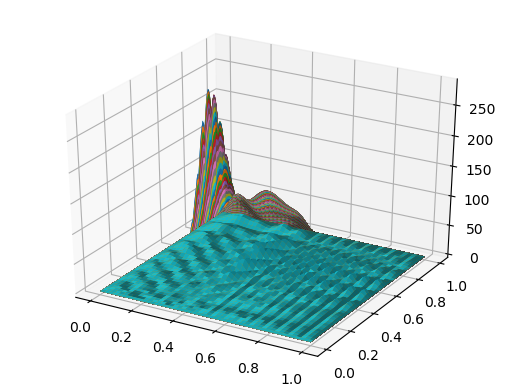

In [15]:
#plotly(show = :ijulia)


#  Initial run of Im(psi) to start off leapfrog process;
I_next = imag_psi_2D(N, I_current, R_current, delta_t, delta_x, V);   


# # Do the leapfrog!! #   
for time_step = 1:2000;         
    # evaluate R at delta_t, 2*delta_t, 3*delta_t.......     
    #     Time is incremented by  t=t+delta_t/2 every call;           
    R_next=real_psi_2D(N, R_current, I_current, delta_t, delta_x, V);            
    R_current=R_next;     
    
    # evaluate I at (3/2)*delta_t, (5/2)*delta_t............           
    # Time is incremented by  t=t+delta_t/2 every call;           
    I_next = imag_psi_2D(N, I_current, R_current, delta_t, delta_x, V);            
    
    # calculate psi*psi  with R(t) and  I(t+delta_t/2) and I(t-delta_t/2)                  
    prob_density=R_current.^2+I_next.*I_current;        
    I_current=I_next;        
#=
    # Visualise results with movie. Plot every 10 calculations for speed            
    if rem(time_step, 10)== 0                             
        #plot(x, prob_density);                 
        #title!("Reflection from cliff")
        #xaxis!("x", (0, 1))
        #yaxis!("Probability density", (0, 200))
        #xlabel!("x")
        #ylabel!("Probability density")
        #display(plot(p1,legend=false))
        #surface(x,y, prob_density, title = "Probability density function", xaxis = ("x", (0, 1)), yaxis = ("y", (0, 1)), zaxis = ("psi*psi'", (0, 100)));
        surf(x,y, prob_density)

        #plot(x, y, prob_density, title = "Probability density function", zaxis = ("psi*psi", (0, 100)), leg = false) #, 
           # xaxis = ("x", (0, 1)), yaxis = ("y", (0, 1)) );
    end
=#
    using Plots
    gr()
    gr(show = :ijulia)
    
    # Visualise results with movie. Plot every 10 calculations for speed            
    if rem(time_step, 10)== 0                             
        #plot(x, prob_density);                 
        #title!("Reflection from cliff")
        #xaxis!("x", (0, 1))
        #yaxis!("Probability density", (0, 200))
        #xlabel!("x")
        #ylabel!("Probability density")
        #display(plot(p1,legend=false))
        #surface(x,y, prob_density, title = "Probability density function", xaxis = ("x", (0, 1)), yaxis = ("y", (0, 1)), zaxis = ("psi*psi'", (0, 100)));
        #surface(x,y, prob_density)        
        Plots.plot(x, y, prob_density, title = "Probability density function", zaxis = ("psi*psi", (0, 100)), leg = false) #, 
           # xaxis = ("x", (0, 1)), yaxis = ("y", (0, 1)) );
    end
    
end